# METHOD 1

### train data = iphone13 : days since release date: 57-160
### test data = iphone 14: days since release date: 59-143
### model: ARIMA
### wmape=14.25%


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split

# Load the iPhone 12 dataset
df  = pd.read_csv('/Users/xueyuanli/Desktop/DS-team/time_series_ML_features_final.csv', parse_dates=['weeks_monday','month_year'])
df['weeks_since_release']=df['days_since_release_date'].floordiv(7)
print(df)

         phone_model weeks_monday  month  year month_year  \
0    apple iphone 11   2021-07-05      7  2021 2021-07-01   
1     apple iphone x   2021-07-05      7  2021 2021-07-01   
2    apple iphone 11   2021-07-12      7  2021 2021-07-01   
3     apple iphone x   2021-07-12      7  2021 2021-07-01   
4    apple iphone 11   2021-07-19      7  2021 2021-07-01   
..               ...          ...    ...   ...        ...   
321  apple iphone 14   2023-02-06      2  2023 2023-02-01   
322  apple iphone 12   2023-02-06      2  2023 2023-02-01   
323  apple iphone 13   2023-02-06      2  2023 2023-02-01   
324  apple iphone 11   2023-02-06      2  2023 2023-02-01   
325   apple iphone x   2023-02-06      2  2023 2023-02-01   

     days_since_release_date  claim  weeks_since_release  
0                        654   2047                   93  
1                       1340    555                  191  
2                        661   1900                   94  
3                       1347   

In [2]:
df13=df[(df['phone_model']=='apple iphone 13')& (df['days_since_release_date']>=57) & (df['days_since_release_date']<=160)]
train_data=df13[['claim','weeks_monday']]
train_data.set_index('weeks_monday', inplace=True)
x_train= train_data.drop('claim', axis=1)
y_train = train_data['claim']

df14=df[df['phone_model']=='apple iphone 14']
test_data=df14[['claim' ,'weeks_monday']]
test_data.set_index('weeks_monday', inplace=True)
x_test= test_data.drop('claim', axis=1)
y_test = test_data['claim']

In [3]:
train_data

,claim
weeks_monday,
2021-12-20,6
2021-12-27,15
2022-01-03,7
2022-01-10,13
2022-01-17,10
2022-01-24,11
2022-01-31,12
2022-02-07,15
2022-02-14,23


/Users/xueyuanli/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/Users/xueyuanli/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/Users/xueyuanli/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/Users/xueyuanli/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                               SARIMAX Results                                
Dep. Variable:                  claim   No. Observations:                   15
Model:               ARIMA(15, 1, 14)   Log Likelihood                 -36.619
Date:                Tue, 11 Apr 2023   AIC                            133.239
Time:                        16:11:24   BIC                            152.411
Sample:                    12-20-2021   HQIC                           131.464
                         - 03-28-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          2.7040     84.928      0.032      0.975    -163.751     169.159
ar.L2         -3.8253     21.197     -0.180      0.857     -45.371      37.720
ar.L3          2.8847     55.245      0.052      0.9

/Users/xueyuanli/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


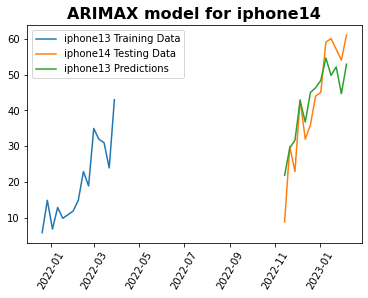

In [4]:
model = ARIMA(train_data, order=(15,1,14))
model = model.fit()

print(model.summary())

predictions = model.predict(start=test_data.index[0],end=test_data.index[-1])

#forecast= model.forecast(start='2022-12-26', end='2023-03-06')

# Visualize the predictions
plt.plot(train_data, label='iphone13 Training Data')
plt.plot(test_data, label='iphone14 Testing Data')
plt.plot(predictions, label='iphone13 Predictions')
#plt.plot(forecast, label='iphone14 forecast')
plt.title('ARIMAX model for iphone14', fontsize=16, fontweight='bold')
plt.xticks(rotation=60)
plt.legend()
plt.show()

In [5]:
def wmape(actual, forecast):
    # we take two series and calculate an output a wmape from it, not to be used in a grouping function

    # make a series called mape
    se_mape = abs(actual-forecast)/actual

    # get a float of the sum of the actual
    ft_actual_sum = actual.sum()

    # get a series of the multiple of the actual & the mape
    se_actual_prod_mape = actual * se_mape

    # summate the prod of the actual and the mape
    ft_actual_prod_mape_sum = se_actual_prod_mape.sum()

    # float: wmape of forecast
    ft_wmape_forecast = ft_actual_prod_mape_sum / ft_actual_sum

    # return a float
    return ft_wmape_forecast

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(test_data['claim'], predictions)
print('MSE:', mse)

wmape=wmape(test_data['claim'],predictions)
print("WMAPE: {:.2%}".format(wmape))

MSE: 51.23837260318975
WMAPE: 14.25%


# same method -> shifted dataset

### train data: iphone 13: weeks_since_release<=20
### test data: all iphone 14( max(weeks)=20 )
### best model:  TweedieRegressor 
### wmape=11.88%

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split

# Load the iPhone 12 dataset
df  = pd.read_csv('/Users/xueyuanli/Desktop/DS-team/time_series_ML_features_final.csv', parse_dates=['weeks_monday','month_year'])
df['weeks_since_release']=df['days_since_release_date'].floordiv(7)


In [14]:
df13=df[(df['phone_model']=='apple iphone 13')& (df['weeks_since_release']<=20)]
train_data=df13[['claim','weeks_monday']]
train_data.set_index('weeks_monday', inplace=True)

df14=df[df['phone_model']=='apple iphone 14']
test_data=df14[['claim' ,'weeks_monday']]
test_data.set_index('weeks_monday', inplace=True)

In [15]:
train_data

,claim
weeks_monday,
2021-11-15,2
2021-11-22,3
2021-11-29,6
2021-12-06,2
2021-12-13,10
2021-12-20,6
2021-12-27,15
2022-01-03,7
2022-01-10,13


In [16]:
# Create lagged features for the claim variable
n_lags = 5 # Choose number of lags
for i in range(1, n_lags+1):
    train_data[f'claim_lag{i}'] = train_data['claim'].shift(i)
    test_data[f'claim_lag{i}'] = test_data['claim'].shift(i)

# Remove missing values from the data
train_data = train_data.dropna()
test_data = test_data.dropna()

# Split data into features and target
X_train = train_data.drop('claim', axis=1)
y_train = train_data['claim']
X_test = test_data.drop('claim', axis=1)
y_test = test_data['claim']

# Convert data frames to numpy arrays
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

Lagged features are created by shifting the value of a variable backwards in time by a certain number of time steps. 

The for loop iterates over the range from 1 to n_lags+1 (inclusive) and for each value i in that range, it creates a new column in both the train_data and test_data data frames. The name of each new column is 'claim_lag{i}', where {i} is the lag number. The value in each row of the new column is the value of the 'claim' variable from i time steps in the past.

For example, 'claim_lag1' will contain the value of 'claim' from the previous time step, 'claim_lag2' will contain the value of 'claim' from two time steps in the past, and so on, up to 'claim_lag5' which will contain the value of 'claim' from five time steps in the past. 

In [17]:
train_data

,claim,claim_lag1,claim_lag2,claim_lag3,claim_lag4,claim_lag5
weeks_monday,,,,,,
2021-12-20,6,10.00,2.00,6.00,3.00,2.00
2021-12-27,15,6.00,10.00,2.00,6.00,3.00
2022-01-03,7,15.00,6.00,10.00,2.00,6.00
2022-01-10,13,7.00,15.00,6.00,10.00,2.00
2022-01-17,10,13.00,7.00,15.00,6.00,10.00
2022-01-24,11,10.00,13.00,7.00,15.00,6.00
2022-01-31,12,11.00,10.00,13.00,7.00,15.00
2022-02-07,15,12.00,11.00,10.00,13.00,7.00
2022-02-14,23,15.00,12.00,11.00,10.00,13.00


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyRegressor
from sklearn.utils import shuffle
import numpy as np


reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric = None)
# Train and test the models
models,predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████████████████████████████████████| 42/42 [00:00<00:00, 110.74it/s]

                               Adjusted R-Squared  R-Squared   RMSE  \
Model                                                                 
TweedieRegressor                            -0.78       0.49   6.13   
ElasticNet                                  -0.79       0.49   6.15   
RidgeCV                                     -0.88       0.46   6.30   
ElasticNetCV                                -0.99       0.43   6.49   
HuberRegressor                              -1.21       0.37   6.83   
Lasso                                       -1.23       0.36   6.87   
LassoCV                                     -1.26       0.35   6.92   
Lars                                        -1.63       0.25   7.46   
TransformedTargetRegressor                  -1.63       0.25   7.46   
LinearRegression                            -1.63       0.25   7.46   
BayesianRidge                               -1.67       0.24   7.52   
Ridge                                       -1.73       0.22   7.59   
SGDReg

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
#model = linear_model.GammaRegressor()
model= linear_model.TweedieRegressor()
#model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
#forecast=model.forecast(steps=5)

In [21]:
def wmape(actual, forecast):
    # we take two series and calculate an output a wmape from it, not to be used in a grouping function

    # make a series called mape
    se_mape = abs(actual-forecast)/actual

    # get a float of the sum of the actual
    ft_actual_sum = actual.sum()

    # get a series of the multiple of the actual & the mape
    se_actual_prod_mape = actual * se_mape

    # summate the prod of the actual and the mape
    ft_actual_prod_mape_sum = se_actual_prod_mape.sum()

    # float: wmape of forecast
    ft_wmape_forecast = ft_actual_prod_mape_sum / ft_actual_sum

    # return a float
    return ft_wmape_forecast

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
print('MSE:', mse)

wmape=wmape(y_test,y_pred)
print("WMAPE: {:.2%}".format(wmape))

MSE: 53.860690716154
WMAPE: 11.88%


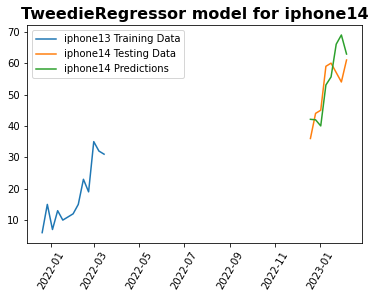

In [23]:
# Visualize the predictions
plt.plot(train_data.index, y_train, label='iphone13 Training Data')
plt.plot(test_data.index, y_test, label='iphone14 Testing Data')
plt.plot(test_data.index, y_pred, label='iphone14 Predictions')
plt.title('TweedieRegressor model for iphone14', fontsize=16, fontweight='bold')
plt.xticks(rotation=60)
plt.legend()
plt.show()

# same method -> shifted dataset

### train data: all iphone 12 
### test data: all iphone 14 
### best model: PassiveAggressiveRegressor model
### wmape=8.94%


In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split

# Load the iPhone 12 dataset
df  = pd.read_csv('/Users/xueyuanli/Desktop/DS-team/time_series_ML_features_final.csv', parse_dates=['weeks_monday','month_year'])
df['weeks_since_release']=df['days_since_release_date'].floordiv(7)



In [143]:
df13=df[(df['phone_model']=='apple iphone 12')]
train_data=df13[['claim','weeks_monday']]
train_data.set_index('weeks_monday', inplace=True)

df14=df[df['phone_model']=='apple iphone 14']
test_data=df14[['claim' ,'weeks_monday']]
test_data.set_index('weeks_monday', inplace=True)

In [144]:
# Create lagged features for the claim variable
n_lags = 5 # Choose number of lags
for i in range(1, n_lags+1):
    train_data[f'claim_lag{i}'] = train_data['claim'].shift(i)
    test_data[f'claim_lag{i}'] = test_data['claim'].shift(i)

# Remove missing values from the data
train_data = train_data.dropna()
test_data = test_data.dropna()

# Split data into features and target
X_train = train_data.drop('claim', axis=1)
y_train = train_data['claim']
X_test = test_data.drop('claim', axis=1)
y_test = test_data['claim']

# Convert data frames to numpy arrays
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

In [145]:
train_data

,claim,claim_lag1,claim_lag2,claim_lag3,claim_lag4,claim_lag5
weeks_monday,,,,,,
2021-09-06,252,274.00,292.00,224.00,219.00,69.00
2021-09-13,266,252.00,274.00,292.00,224.00,219.00
2021-09-20,293,266.00,252.00,274.00,292.00,224.00
2021-09-27,324,293.00,266.00,252.00,274.00,292.00
2021-10-04,377,324.00,293.00,266.00,252.00,274.00
...,...,...,...,...,...,...
2023-01-09,1558,1320.00,1047.00,963.00,1319.00,1279.00
2023-01-16,1552,1558.00,1320.00,1047.00,963.00,1319.00
2023-01-23,1407,1552.00,1558.00,1320.00,1047.00,963.00


In [146]:
import pandas as pd
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyRegressor
from sklearn.utils import shuffle
import numpy as np


reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric = None)
# Train and test the models
models,predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)

100%|███████████████████████████████████████████| 42/42 [00:00<00:00, 63.75it/s]

                               Adjusted R-Squared  R-Squared    RMSE  \
Model                                                                  
PassiveAggressiveRegressor                  -1.67       0.24    7.52   
LinearSVR                                  -27.52      -7.15   24.56   
HuberRegressor                             -33.40      -8.83   26.97   
MLPRegressor                               -59.44     -16.27   35.75   
LinearRegression                           -65.49     -18.00   37.49   
TransformedTargetRegressor                 -65.49     -18.00   37.49   
Lars                                       -65.49     -18.00   37.49   
LassoLarsIC                                -65.49     -18.00   37.49   
Lasso                                      -73.98     -20.42   39.81   
BayesianRidge                              -76.70     -21.20   40.53   
SGDRegressor                               -80.24     -22.21   41.44   
RANSACRegressor                            -81.81     -22.66   4

In [147]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.linear_model import PassiveAggressiveRegressor
#model = linear_model.GammaRegressor()
#model= linear_model.TweedieRegressor()
#model = LinearRegression()
model=PassiveAggressiveRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
#forecast=model.forecast(steps=5)

In [74]:
def wmape(actual, forecast):
    # we take two series and calculate an output a wmape from it, not to be used in a grouping function

    # make a series called mape
    se_mape = abs(actual-forecast)/actual

    # get a float of the sum of the actual
    ft_actual_sum = actual.sum()

    # get a series of the multiple of the actual & the mape
    se_actual_prod_mape = actual * se_mape

    # summate the prod of the actual and the mape
    ft_actual_prod_mape_sum = se_actual_prod_mape.sum()

    # float: wmape of forecast
    ft_wmape_forecast = ft_actual_prod_mape_sum / ft_actual_sum

    # return a float
    return ft_wmape_forecast

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
print('MSE:', mse)

wmape=wmape(y_test,y_pred)
print("WMAPE: {:.2%}".format(wmape))

MSE: 33.268641178156
WMAPE: 8.94%


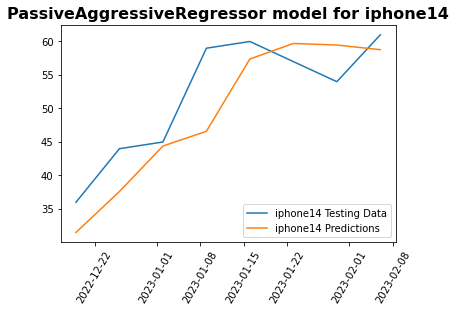

In [150]:
# Visualize the predictions
plt.plot(test_data.index, y_test, label='iphone14 Testing Data')
plt.plot(test_data.index,y_pred, label='iphone14 Predictions')
plt.title('PassiveAggressiveRegressor model for iphone14', fontsize=16, fontweight='bold')
plt.xticks(rotation=60)
plt.legend()
plt.show()

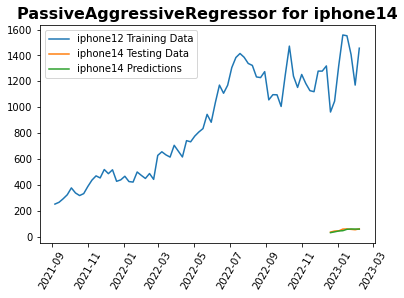

In [151]:
# Visualize the predictions
plt.plot(train_data.index, y_train, label='iphone12 Training Data')
plt.plot(test_data.index, y_test, label='iphone14 Testing Data')
plt.plot(test_data.index,y_pred, label='iphone14 Predictions')
plt.title('PassiveAggressiveRegressor for iphone14', fontsize=16, fontweight='bold')
plt.xticks(rotation=60)
plt.legend()
plt.show()

# same method -> shifted dataset

## train data: all iphone 13 
## test data: all iphone 14 
## best model: PassiveAggressiveRegressor
## wmape=15.44%

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split

# Load the iPhone 12 dataset
df  = pd.read_csv('/Users/xueyuanli/Desktop/DS-team/time_series_ML_features_final.csv', parse_dates=['weeks_monday','month_year'])
df['weeks_since_release']=df['days_since_release_date'].floordiv(7)




In [133]:
df13=df[(df['phone_model']=='apple iphone 13')]
train_data=df13[['claim','weeks_monday']]
train_data.set_index('weeks_monday', inplace=True)


df14=df[df['phone_model']=='apple iphone 14']
test_data=df14[['claim' ,'weeks_monday']]
test_data.set_index('weeks_monday', inplace=True)


In [134]:
# Create lagged features for the claim variable
n_lags = 5 # Choose number of lags
for i in range(1, n_lags+1):
    train_data[f'claim_lag{i}'] = train_data['claim'].shift(i)
    test_data[f'claim_lag{i}'] = test_data['claim'].shift(i)

# Remove missing values from the data
train_data = train_data.dropna()
test_data = test_data.dropna()

# Split data into features and target
X_train = train_data.drop('claim', axis=1)
y_train = train_data['claim']
X_test = test_data.drop('claim', axis=1)
y_test = test_data['claim']

# Convert data frames to numpy arrays
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

In [135]:
train_data

,claim,claim_lag1,claim_lag2,claim_lag3,claim_lag4,claim_lag5
weeks_monday,,,,,,
2021-12-20,6,10.00,2.00,6.00,3.00,2.00
2021-12-27,15,6.00,10.00,2.00,6.00,3.00
2022-01-03,7,15.00,6.00,10.00,2.00,6.00
2022-01-10,13,7.00,15.00,6.00,10.00,2.00
2022-01-17,10,13.00,7.00,15.00,6.00,10.00
2022-01-24,11,10.00,13.00,7.00,15.00,6.00
2022-01-31,12,11.00,10.00,13.00,7.00,15.00
2022-02-07,15,12.00,11.00,10.00,13.00,7.00
2022-02-14,23,15.00,12.00,11.00,10.00,13.00


In [136]:
import pandas as pd
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyRegressor
from sklearn.utils import shuffle
import numpy as np


reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric = None)
# Train and test the models
models,predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)

100%|███████████████████████████████████████████| 42/42 [00:00<00:00, 75.86it/s]

                               Adjusted R-Squared  R-Squared   RMSE  \
Model                                                                 
PassiveAggressiveRegressor                  -0.56       0.55   5.75   
HuberRegressor                              -2.76      -0.07   8.91   
HistGradientBoostingRegressor               -7.67      -1.48  13.54   
TransformedTargetRegressor                 -13.31      -3.09  17.40   
LinearRegression                           -13.31      -3.09  17.40   
Lars                                       -13.31      -3.09  17.40   
OrthogonalMatchingPursuitCV                -13.54      -3.16  17.53   
LassoLarsIC                                -13.72      -3.20  17.64   
RidgeCV                                    -13.87      -3.25  17.73   
KNeighborsRegressor                        -14.22      -3.35  17.94   
Lasso                                      -14.70      -3.49  18.22   
BayesianRidge                              -14.71      -3.49  18.22   
SGDReg

In [137]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.linear_model import PassiveAggressiveRegressor
#model = linear_model.GammaRegressor()
#model= linear_model.TweedieRegressor()
#model = LinearRegression()
model=PassiveAggressiveRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
#forecast=model.forecast(steps=5)

In [138]:
def wmape(actual, forecast):
    # we take two series and calculate an output a wmape from it, not to be used in a grouping function

    # make a series called mape
    se_mape = abs(actual-forecast)/actual

    # get a float of the sum of the actual
    ft_actual_sum = actual.sum()

    # get a series of the multiple of the actual & the mape
    se_actual_prod_mape = actual * se_mape

    # summate the prod of the actual and the mape
    ft_actual_prod_mape_sum = se_actual_prod_mape.sum()

    # float: wmape of forecast
    ft_wmape_forecast = ft_actual_prod_mape_sum / ft_actual_sum

    # return a float
    return ft_wmape_forecast

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
print('MSE:', mse)

wmape=wmape(y_test,y_pred)
print("WMAPE: {:.2%}".format(wmape))

MSE: 65.73806059511081
WMAPE: 15.44%


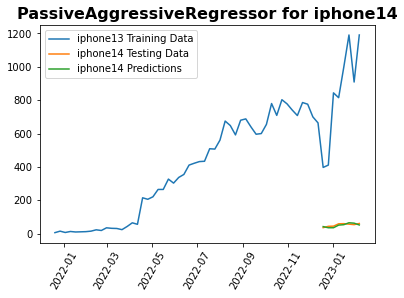

In [140]:
# Visualize the predictions
plt.plot(train_data.index, y_train, label='iphone13 Training Data')
plt.plot(test_data.index, y_test, label='iphone14 Testing Data')
plt.plot(test_data.index,y_pred, label='iphone14 Predictions')
plt.title('PassiveAggressiveRegressor for iphone14', fontsize=16, fontweight='bold')
plt.xticks(rotation=60)
plt.legend()
plt.show()

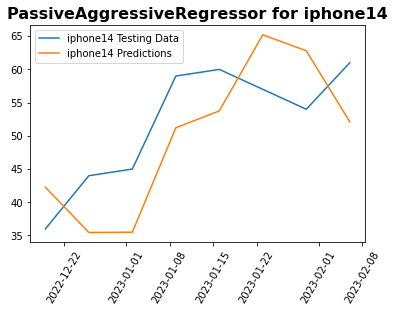

In [141]:
plt.plot(test_data.index, y_test, label='iphone14 Testing Data')
plt.plot(test_data.index,y_pred, label='iphone14 Predictions')
plt.title('PassiveAggressiveRegressor for iphone14', fontsize=16, fontweight='bold')
plt.xticks(rotation=60)
plt.legend()
plt.show()